# Student Mental Health Analysis Project

# <center>Introduction</center>

University offers a fantastic opportunity for you to gain independence, collect new experiences and make friends but for some students it's not a positive experience 100% of the time.

**Member lists**

|Full Name|MSSV|Tasks|Contribution 
| :------ | :---: | :--------- | :--------------------------
|Lâm Thị Xuân Thy|20127082||100%
|Đào Ngọc Hoa|20127500||100%

## I. Collecting data
**General: Collecting data on Kaggle**

**Link:** 
> https://www.kaggle.com/datasets/shariful07/student-mental-health?fbclid=IwAR28tzZnwqReWZ4_Y-oKhFrEk6RcayC7GazLiiHXggREmAMefijZVx93O6Q

### What subject is your data about?

*Answer: The subject is Student's Mental Health (A STATISTICAL RESEARCH ON THE EFFECTS OF MENTAL HEALTH ON STUDENTS’ CGPA )*

### What is the source of your data?

*Answer: A STATISTICAL RESEARCH ON THE EFFECTS OF MENTAL HEALTH ON STUDENTS’ CGPA dataset
This Data set was collected by a survey conducted by Google forms from students in **International Islamic University Malaysia** in order to examine their current academic situation and mental health*

### Do authors of this data allow you to use like this? You can check the data license

*Answer*: 

*- Yes they allow for people to use this data.*

*- Yes, I can check the data license.*


![image info](License.png)

### How did authors collect data?

*Answer: This Data set was collected by a survey conducted by Google forms from University student in order to examine their current academic situation and mental health*

------------

## II. Data Exploration 
(This process is often interleaved with preprocessing)

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import preprocessing 
from datetime import datetime, date, time, timezone
from sklearn.metrics import accuracy_score


import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.linear_model import LogisticRegression

### Read data

In [2]:
data = pd.read_csv('data/Student Mental health.csv')
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [3]:
#Rename columns
data.columns = ['Timestamp', 'Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment']
data.head(1)

,Timestamp,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No


### Initial observation of the distribution of values ​​of attributes in data through visual charts

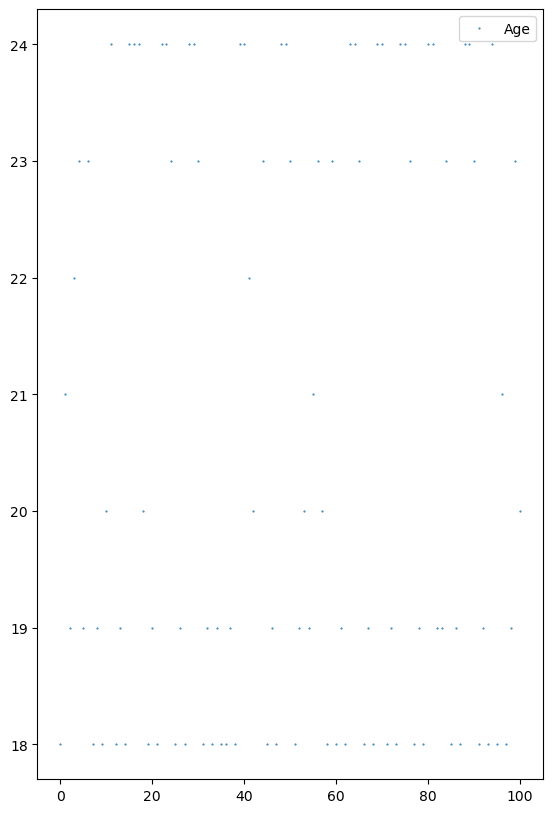

In [4]:
data.plot(lw=0, marker=".", subplots=True, layout=(-1, 4), figsize=(30, 10), markersize=1)
plt.show()

### General observation of the correlation of attributes in the data through the correlation matrix

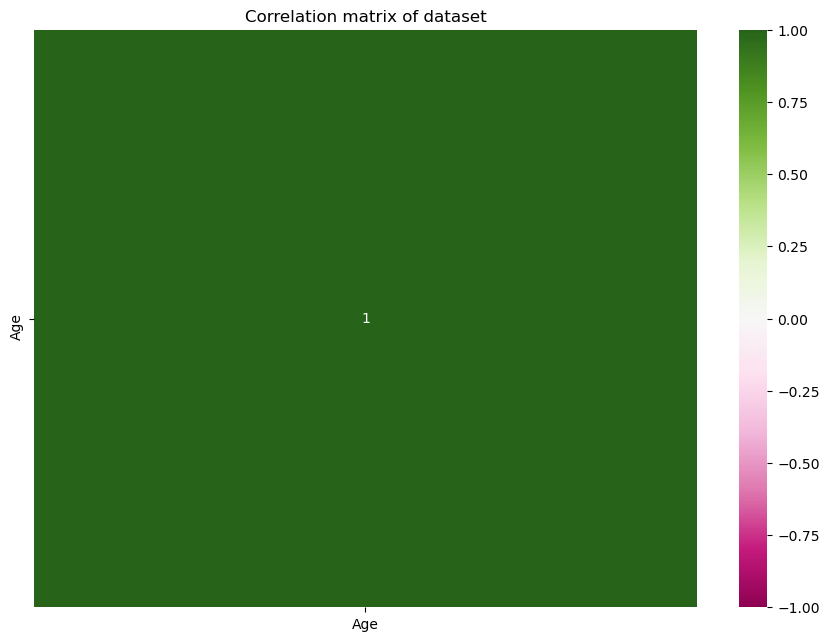

In [5]:
plt.figure(figsize=(10.7,7.5))
track_corr = sns.heatmap(data.corr(),vmin=-1, vmax=1, cmap='PiYG', annot=True)
plt.title('Correlation matrix of dataset')
plt.show()

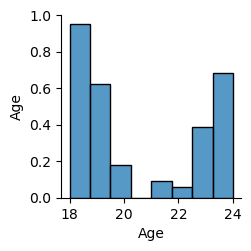

In [6]:
sns.pairplot(data)
plt.show()

In [7]:
data.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


### Specifically observation of the distribution of values ​​of attributes in data through visual charts

#### a. How many rows and how many columns?

In [8]:
rows, cols = data.shape

*The number of rows:*

In [9]:
rows

101

*The number of columns:*

In [10]:
cols

11

#### b. What is the meaning of each row?

*Answer: Each row is a record of a student to find out whether they have any mental problems.*

#### c. Are there duplicated rows?

In [11]:
data.duplicated().sum()

0

*-> no duplicated.*

#### d. What is the meaning of each column?

|Atrribute|Meanings
| :------ | :---:
|Timestamp|Thời gian khởi tạo
|Choose your gender|Giới tính
|Age|Tuổi
|What is your course?|Khóa học tham gia
|Your current year of Study|Năm theo học hiện tại
|What is your CGPA?|Điểm GPA trung bình
|Marital status|Tình trạng hôn nhân
|Do you have Depression| Bạn có stress không? (Yes-No Question)
|Do you have Anxiety?| Bạn có lo lắng không? (Yes-No Question)
|Do you have Panic attack?| Bạn có bị các tác nhân gây hoảng sợ không (Yes-No Question)
|Did you seek any specialist for a treatment?| Bạn có tìm kiếm chuyên gia điều trị không?

#### e. What is the current data type of each column? Are there columns having inappropriate data types?

In [12]:
data.dtypes

Timestamp          object
Gender             object
Age               float64
Course             object
Year               object
CGPA               object
Marital_Status     object
Depression         object
Anxiety            object
Panic_Attack       object
Treatment          object
dtype: object

*Answer: Timestamp need to be changed to datetime.*

**Convert datatype of `Timestamp` to datatime**

In [13]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

#### f. With each numerical column, how are values distributed?

In [14]:
# YOUR CODE HERE
nume_data = data.describe()
missing_percentage = ((1-nume_data.loc['count']/rows) * 100).round(1)
nume_col_info_df = pd.DataFrame({'missing_percentage':missing_percentage,
                                 'min': nume_data.loc['min'],
                                'max': nume_data.loc['max']})
nume_col_info_df = nume_col_info_df.T
nume_col_info_df

,Age
missing_percentage,1.0
min,18.0
max,24.0


*-> Không có gì bất thường*

#### g. With each categorical column, how are values distributed?

##### General observation

In [15]:
pd.set_option('display.max_colwidth', 100) # Để dễ nhìn
pd.set_option('display.max_columns', None) # Để dễ nhìn
# YOUR CODE HERE
cat_data = data.select_dtypes(include=['object'])
value_percentages = cat_data.apply(lambda x: (x.explode().dropna().value_counts(normalize = True)*100).round(1).to_dict())
missing_percentage = cat_data.apply(lambda x: ((1-x.value_counts().sum()/len(data)) * 100).round(1))
num_values = cat_data.apply(lambda x: len(pd.Series(x.unique()).explode().dropna().unique()))
cate_col_info_df = pd.DataFrame({'missing_percentage':missing_percentage,
                                'num_values':num_values,
                                'value_percentages': value_percentages})
cate_col_info_df = cate_col_info_df.T

cate_col_info_df

,Gender,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
missing_percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,2,49,7,6,2,2,2,2,2
value_percentages,"{'Female': 74.3, 'Male': 25.7}","{'BCS': 17.8, 'Engineering': 16.8, 'BIT': 9.9, 'Biomedical science': 4.0, 'KOE': 4.0, 'psycholog...","{'year 1': 40.6, 'Year 3': 18.8, 'Year 2': 15.8, 'year 2': 9.9, 'year 4': 7.9, 'year 3': 5.0, 'Y...","{'3.50 - 4.00': 46.5, '3.00 - 3.49': 42.6, '0 - 1.99': 4.0, '2.50 - 2.99': 4.0, '2.00 - 2.49': 2...","{'No': 84.2, 'Yes': 15.8}","{'No': 65.3, 'Yes': 34.7}","{'No': 66.3, 'Yes': 33.7}","{'No': 67.3, 'Yes': 32.7}","{'No': 94.1, 'Yes': 5.9}"


Overall, the mising percentage of all catergorical columns are 0.0%. However, there are some abnormal data we need to consider and preprocess.

##### 1. Gender

This column is reasonable.

In [16]:
num_gender = pd.Series(cate_col_info_df.loc['value_percentages','Gender'])

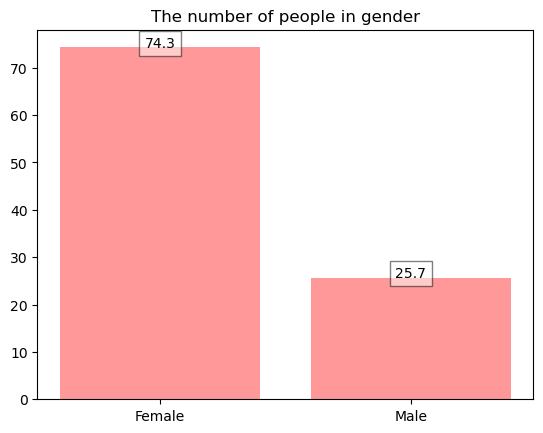

In [17]:
#VISUALIZE
plt.bar(num_gender.index , num_gender.values, alpha = 0.4, color = 'r')
plt.title("The number of people in gender")
for i in range(len(num_gender.index)):
    plt.text(i, num_gender.values[i], num_gender.values[i], ha = 'center', bbox = dict(facecolor = 'white', alpha = .5))
plt.show()

##### 2. Course

In [18]:
data['Course'].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

As what we can see, this column is unvalid, since `Psychology` and `psychology` are the same majors; `engin`, `engine` and `engineering` are the same majors; `Fiqh fatwa` and `fiqh` are similar, for example. Therefore, in the following step, I would preprocess this column.

In [19]:
data['Course'] = data['Course'].str.strip()
data['Course'] = data['Course'].str.capitalize()
data['Course'].replace({'Engin': 'Engineering' , 'Engine':'Engineering' ,'Bit':'It','Kirkhs': 'Irkhs', 'Fiqh fatwa': 'Fiqh', 'Laws': 'Law'} , inplace = True)

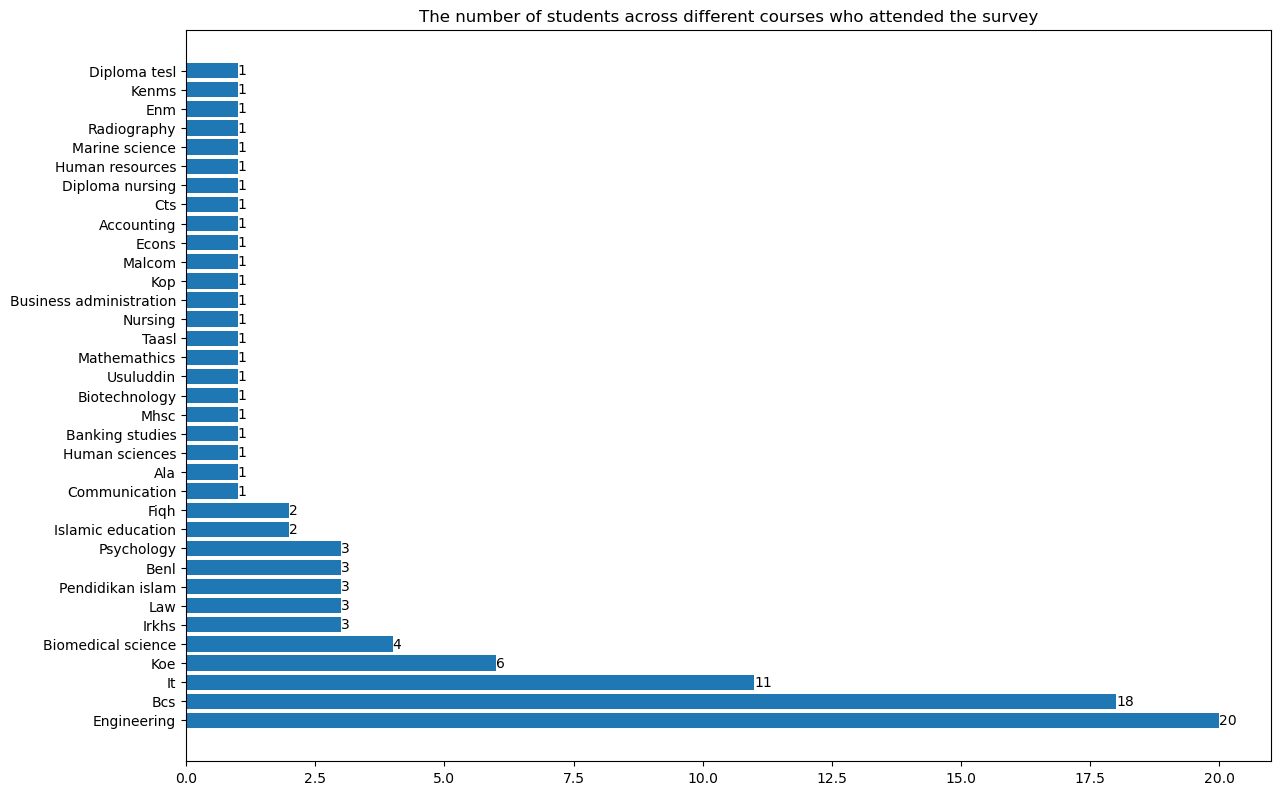

In [20]:
#Visualize the current courses
courses = data['Course'].value_counts()
fig, ax = plt.subplots(figsize=(14,9.5))
bars = ax.barh(courses.index , courses.values)
ax.bar_label(bars)
plt.title('The number of students across different courses who attended the survey')
plt.show()

##### 3. Year of study

In [21]:
data['Year'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

As we can see, `year 1` and `Year 1` are not different, for instance, so I would preprocess it.

In [22]:
data['Year'] = [i[len(i) - 1] for i in data['Year']]
num_years = data['Year'].value_counts()
num_years = num_years.sort_index()

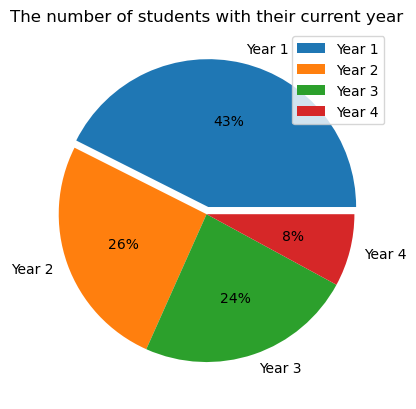

In [23]:
#visualize
myexplode = [0.05, 0, 0, 0]
total = sum(num_years)
plt.pie(num_years, labels = 'Year ' + num_years.index, explode = myexplode, autopct=lambda p: '{:.0f}%'.format(p * total / 100))
plt.title("The number of students with their current year")
plt.legend()
plt.show()

##### 4. What is your CGPA?

In [24]:
data['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

As we can see, `3.50 - 4.00` and `3.50 - 4.00` are similar, so we would fix it.

In [25]:
data['CGPA'] = data['CGPA'].str.strip()
num_CGPA = data['CGPA'].value_counts()
num_CGPA = num_CGPA.sort_index()
num_CGPA

0 - 1.99        4
2.00 - 2.49     2
2.50 - 2.99     4
3.00 - 3.49    43
3.50 - 4.00    48
Name: CGPA, dtype: int64

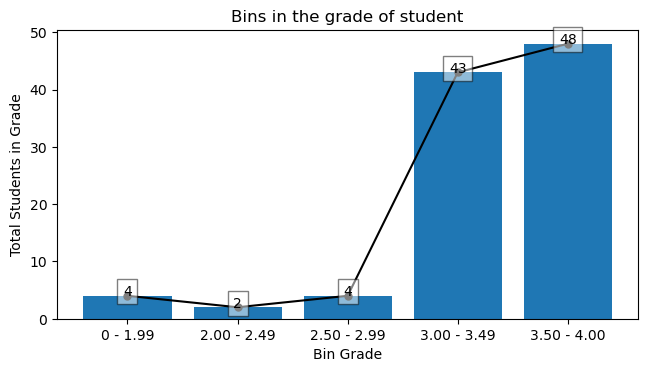

In [26]:
plt.figure(figsize=(7.5,3.75))
plt.bar(num_CGPA.index , num_CGPA.values)
plt.xlabel("Bin Grade")
plt.ylabel("Total Students in Grade")
plt.title("Bins in the grade of student")
for i in range(len(num_CGPA.index)):
    plt.text(i, num_CGPA.values[i], num_CGPA.values[i], ha = 'center', bbox = dict(facecolor = 'white', alpha = .5))
    
plt.plot(num_CGPA.values, marker='.', color='black', ms=10)
plt.show()

Qua biểu đồ trên, ta có thể thấy những người điền phiếu khảo sát đa phần có học lực khá giỏi, với GPA từ `3.0` trở lên

##### 5. Marital status

In [27]:
marital_status = data[['Marital_Status', 'Gender']]
results_status = marital_status.groupby(['Marital_Status','Gender']).size()

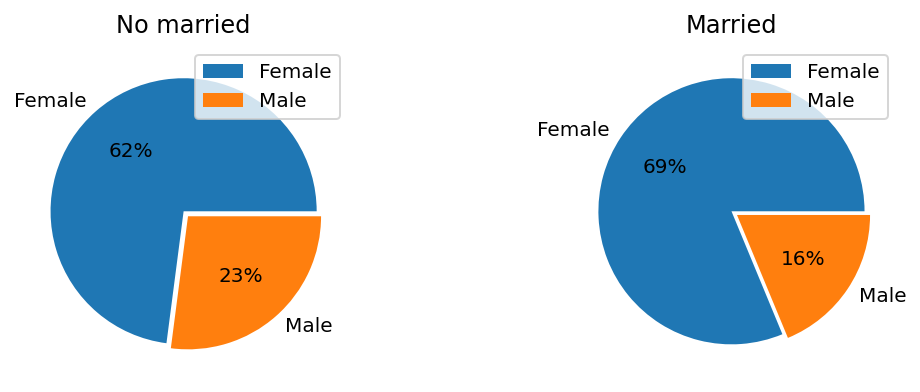

In [28]:
# the same figure for both subplots
fig = plt.figure(figsize=(9,3),dpi=144)

explode = (0, 0.05)
total = sum(results_status['No'])
ax1 = fig.add_subplot(121)
ax1.pie(results_status['No'], labels = results_status['No'].index, 
        autopct=lambda p: '{:.0f}%'.format(p * total / 100), explode=explode)
ax1.set_title('No married')
ax1.legend()


total = sum(results_status['No'])
ax2 = fig.add_subplot(122)
ax2.set_title('Married')
ax2.pie(results_status['Yes'], labels = results_status['Yes'].index, 
        autopct=lambda p: '{:.0f}%'.format(p * total / 100), explode=explode)
ax2.legend()
plt.show()

##### 6. Do you have Depression?

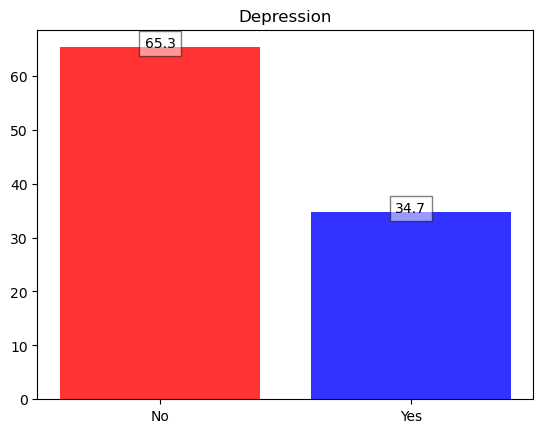

In [29]:
num_depression = pd.Series(cate_col_info_df.loc['value_percentages','Depression'])
plt.bar(num_depression.index , num_depression.values, alpha = 0.8, color = ['red', 'blue'])
plt.title("Depression")
for i in range(len(num_depression.index)):
    plt.text(i, num_depression.values[i], num_depression.values[i], ha = 'center', bbox = dict(facecolor = 'white', alpha = .5))
plt.show()

##### 7. Do you have Anxiety?

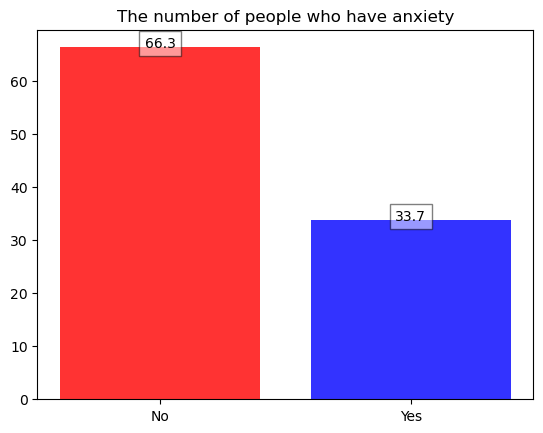

In [30]:
num_anxiety = pd.Series(cate_col_info_df.loc['value_percentages','Anxiety'])
plt.bar(num_anxiety.index , num_anxiety.values, alpha = 0.8, color = ['red', 'blue'])
plt.title("The number of people who have anxiety")
for i in range(len(num_anxiety.index)):
    plt.text(i, num_anxiety.values[i], num_anxiety.values[i], ha = 'center', bbox = dict(facecolor = 'white', alpha = .5))
plt.show()

##### 8. Do you have Panic attack?

In [31]:
num_panic = pd.Series(cate_col_info_df.loc['value_percentages','Panic_Attack'])

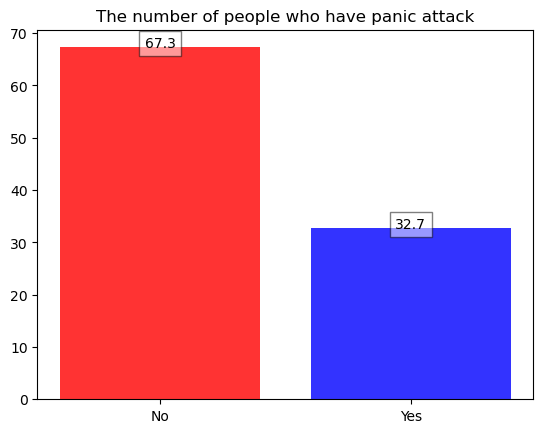

In [32]:
plt.bar(num_panic.index , num_panic.values, alpha = 0.8, color = ['red', 'blue'])
plt.title("The number of people who have panic attack")


for i in range(len(num_panic.index)):
    plt.text(i, num_panic.values[i], num_panic.values[i], ha = 'center', bbox = dict(facecolor = 'white', alpha = .5))
plt.show()

##### 10. Did you seek any specialist for a treatment?

In [33]:
num_spe = pd.Series(cate_col_info_df.loc['value_percentages','Treatment'])

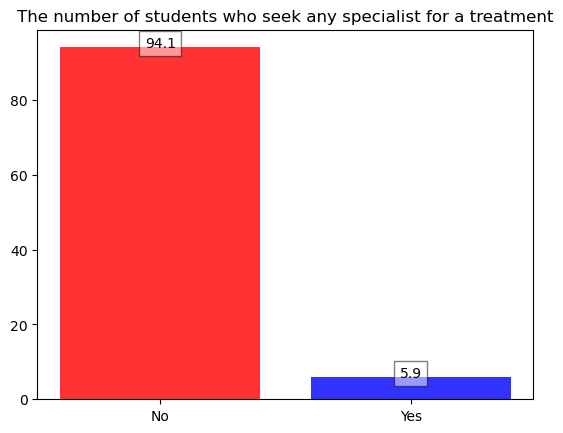

In [34]:
plt.bar(num_spe.index , num_spe.values, alpha = 0.8, color = ['red', 'blue'])
plt.title("The number of students who seek any specialist for a treatment")
for i in range(len(num_spe.index)):
    plt.text(i, num_spe.values[i], num_spe.values[i], ha = 'center', bbox = dict(facecolor = 'white', alpha = .5))
plt.show()

-------------------

# III. Asking meaningful questions

# Question 1: <center>Are there any relationship between the studying environment and the current mental health issues?</center>
**Introduction:**
 With the hope to improve the mental health of students, the school want to come up with some solutions to decrease the pressures that students are suffering. Therefore, they have conducted a survey, with the aim to help students express their feelings and current mental health conditions. Determining the students who actually nead some mental treatments would be very meaningful, from that the school could have some useful solution to encourage students to come through their difficulties and improve the quality of education, like planning mental healthcare programmes, improving the current diploma and creating a learner-friendly environment.

### Years analysis

First of all, we should know the size of our data.

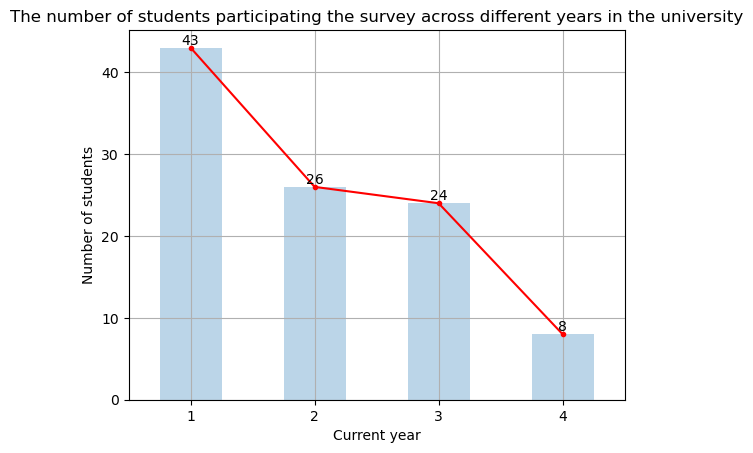

In [35]:
years = data['Year'].value_counts()
years = years.sort_index()
years
score_series = pd.Series(years.values)
x_labels = years.index
plt.figure()
fig = score_series.plot(kind='bar', alpha=0.3)
fig.set_xticklabels(x_labels, rotation = 'horizontal')
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_xlabel('Current year')
fig.set_ylabel('Number of students')
plt.grid(True)
plt.plot(years.values, marker = ".", color = 'r')
plt.title("The number of students participating the survey across different years in the university")
plt.show()

At the first glance, the 1st year students has more consideration to mental health problems, while just a few 4th year students take part in this survey. It seem that the level of caring about their mental health has declined each year.

In [36]:
df= data.replace('No',np.nan).groupby(['Year']).count()
df

,Timestamp,Gender,Age,Course,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
Year,,,,,,,,,,
1,43,43,42,43,43,1,14,14,14,3
2,26,26,26,26,26,7,10,10,8,2
3,24,24,24,24,24,7,10,8,10,1
4,8,8,8,8,8,1,1,2,1,0


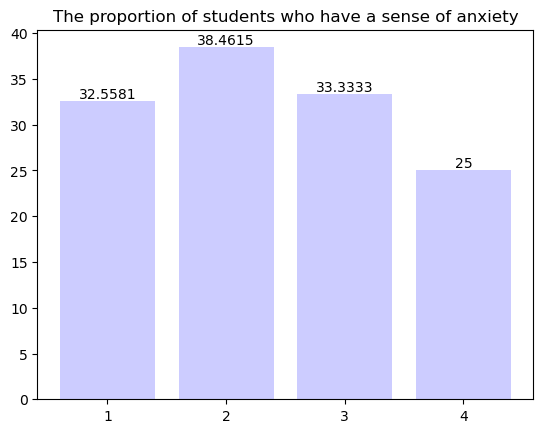

In [37]:
# YOUR CODE HERE
fig, ax = plt.subplots()
bars= ax.bar(df.index, df['Anxiety']/df['Timestamp']*100,color='#CCCCFF')
ax.bar_label(bars)
ax.set_title('The proportion of students who have a sense of anxiety')

plt.show()

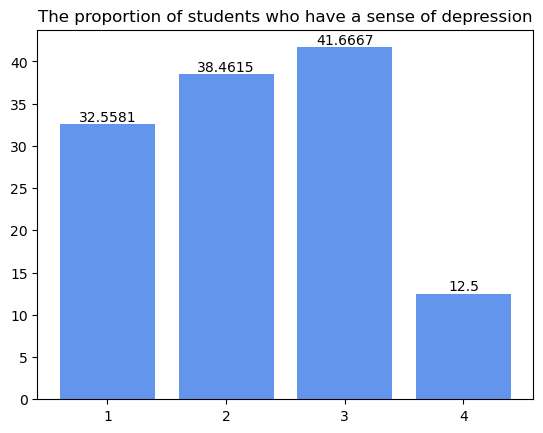

In [40]:
# YOUR CODE HERE
fig, ax = plt.subplots()
bars= ax.bar(df.index, df['Depression']/df['Timestamp']*100,color='#6495ED')
ax.bar_label(bars)
ax.set_title('The proportion of students who have a sense of depression')

plt.show()

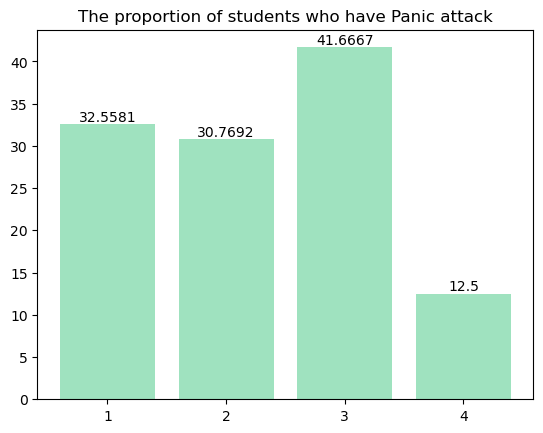

In [41]:
fig, ax = plt.subplots()
bars= ax.bar(df.index, df['Panic_Attack']/df['Timestamp']*100,color='#9FE2BF')
ax.bar_label(bars)
ax.set_title('The proportion of students who have Panic attack')

plt.show()

A interesting point is that although the number of 1st year students ranks the first position of taking part in this survey, the percentage of participants who are 2nd or 3rd year have higher senses of anxiety, depression and panic attack.

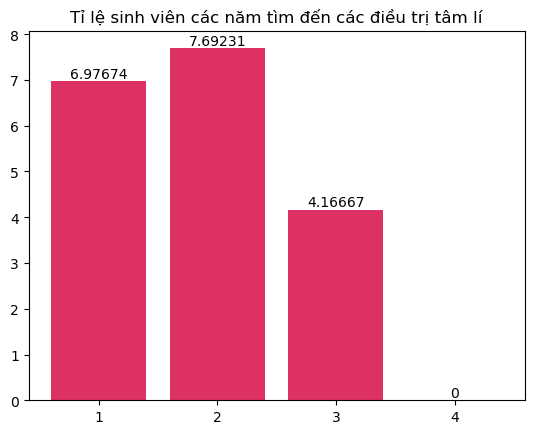

In [42]:

fig, ax = plt.subplots()
bars= ax.bar(df.index, df['Treatment']/df['Timestamp']*100,color='#DE3163')
ax.bar_label(bars)
ax.set_title('Tỉ lệ sinh viên các năm tìm đến các điều trị tâm lí')

plt.show()

Another interesting point is that The proportion of 1st and 2nd year students are quite high, while the 3rd students who have sought some medical treatment just makes up with 4.17%

## CGPA Analysis

Secondly, we will analyse data with respect to the current GPA. **Is having better study results effect the mental health?**

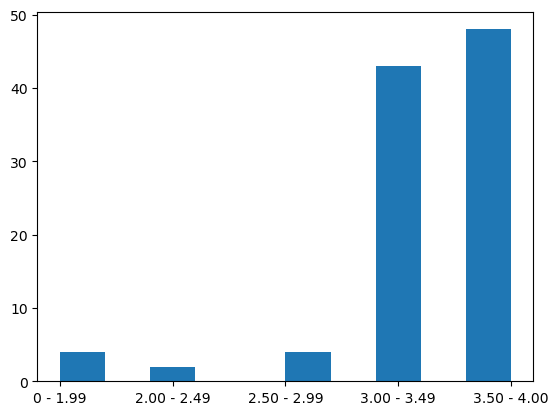

In [43]:
plt.hist(data['CGPA'].sort_values())
plt.show() 

So, we can see that the majority of students whor are interested in this survey have good grades. Further analysis would be biased since the number of lower grade students is so little. So I would group these student to one group `0-2.99`.

In [44]:
data['CGPA'].replace({'0 - 1.99':'0 - 2.99','2.00 - 2.49':'0 - 2.99','2.50 - 2.99':'0 - 2.99'},inplace=True)
data['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '0 - 2.99'], dtype=object)

In [45]:
data['CGPA'].replace({'0-1.99':'0-2.99','2-2.49':'0-2.99','2.5-2.99':'0-2.99'},inplace=True)
df = df= data.replace('No',np.nan).groupby(['CGPA','Gender']).count().reset_index(level=1)
df

,Gender,Timestamp,Age,Course,Year,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
CGPA,,,,,,,,,,
0 - 2.99,Female,7,7,7,7,2,3,1,4,2
0 - 2.99,Male,3,2,3,3,0,0,0,1,0
3.00 - 3.49,Female,29,29,29,29,5,14,9,7,0
3.00 - 3.49,Male,14,14,14,14,2,5,6,2,0
3.50 - 4.00,Female,39,39,39,39,6,12,14,14,3
3.50 - 4.00,Male,9,9,9,9,1,1,4,5,1


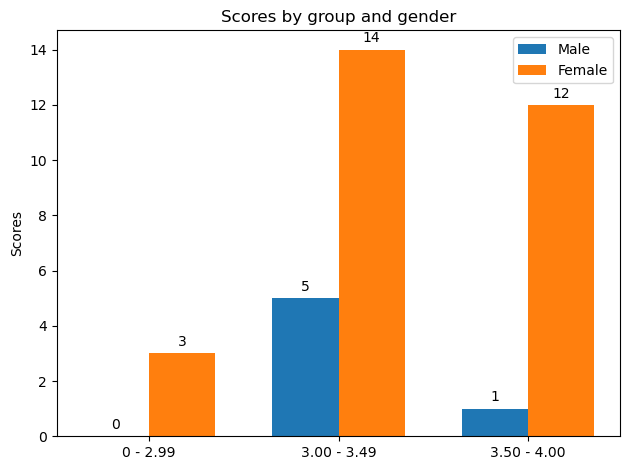

In [46]:
labels = ['0 - 2.99','3.00 - 3.49','3.50 - 4.00']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df[df['Gender']=='Male']['Depression'],width, label='Male')
rects2 = ax.bar(x + width/2,  df[df['Gender']=='Female']['Depression'],width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()

plt.show()

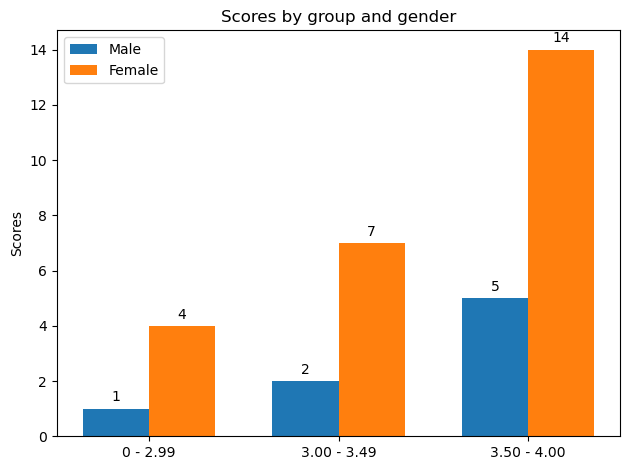

In [47]:
labels = ['0 - 2.99','3.00 - 3.49','3.50 - 4.00']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df[df['Gender']=='Male']['Panic_Attack'],width, label='Male')
rects2 = ax.bar(x + width/2,  df[df['Gender']=='Female']['Panic_Attack'],width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()

plt.show()

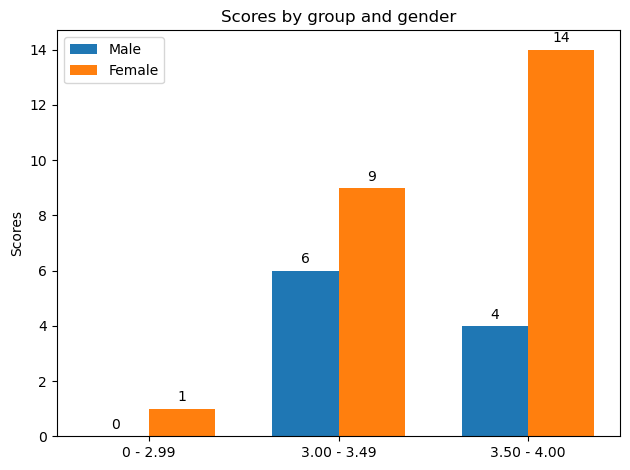

In [48]:
labels = ['0 - 2.99','3.00 - 3.49','3.50 - 4.00']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df[df['Gender']=='Male']['Anxiety'],width, label='Male')
rects2 = ax.bar(x + width/2,  df[df['Gender']=='Female']['Anxiety'],width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()

plt.show()

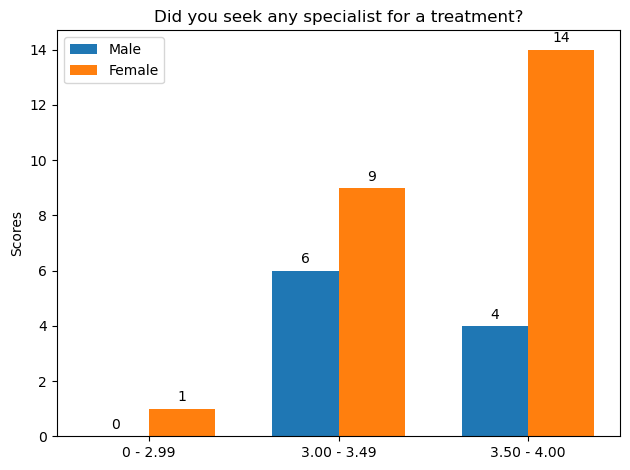

In [49]:
labels = ['0 - 2.99','3.00 - 3.49','3.50 - 4.00']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df[df['Gender']=='Male']['Anxiety'],width, label='Male')
rects2 = ax.bar(x + width/2,  df[df['Gender']=='Female']['Anxiety'],width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Did you seek any specialist for a treatment?')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()

plt.show()

The visual representation of the GPA analysis with added gender dimensionality has suggested that the higher GPA is, the higher sense of mental health issues. On the other hand, many felmale students suppose that they are suffering from mental health problems.

## Age analysis

In [50]:
df = data.replace('No',np.nan).groupby(['Age']).count()
df

,Timestamp,Gender,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
Age,,,,,,,,,,
18.0,32,32,32,32,32,3,11,14,9,2
19.0,21,21,21,21,21,4,9,5,9,1
20.0,6,6,6,6,6,1,3,3,1,0
21.0,3,3,3,3,3,0,0,2,0,0
22.0,2,2,2,2,2,1,1,0,0,0
23.0,13,13,13,13,13,2,5,2,5,1
24.0,23,23,23,23,23,5,6,8,9,2


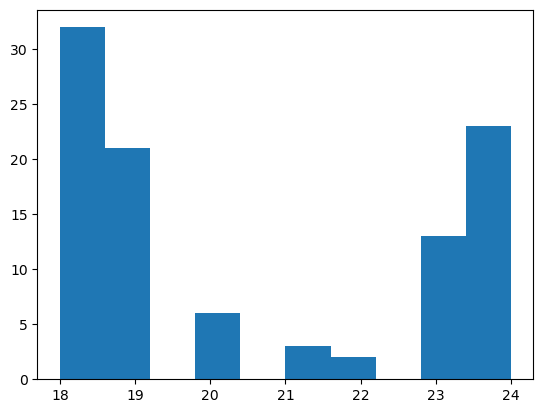

In [51]:
plt.hist(data.Age)
plt.show() 

## Major analysis

In [52]:
data['Major'] = data['Course'].replace({'Accounting':'Others',
                                      'Ala':'Arts, Humanities and Social Sciences',
                                      'Banking studies':'Others',
                                      'Bcs':'Engineering and Technology',
                                      'Benl':'Arts, Humanities and Social Sciences',
                                      'Biomedical science':'Human Health',
                                      'Biotechnology':'Engineering and Technology',
                                      'Business administration':'Others',
                                      'Communication':'Arts, Humanities and Social Sciences',
                                      'Cts':'Others',
                                      'Diploma nursing':'Human Health',
                                      'Diploma tesl':'Arts, Humanities and Social Sciences',
                                      'Econs':'Others',
                                      'Engineering':'Engineering and Technology',
                                      'Enm':'Engineering and Technology',
                                      'Fiqh':'Arts, Humanities and Social Sciences',
                                      'Human resources':'Others',
                                      'Human sciences':'Arts, Humanities and Social Sciences',
                                      'Irkhs':'Arts, Humanities and Social Sciences',
                                      'Islamic education':'Arts, Humanities and Social Sciences',
                                      'It':'Engineering and Technology',
                                      'Kenms':'Others',
                                      'Koe':'Engineering and Technology',
                                      'Kop':'Human Health',
                                      'Law':'Arts, Humanities and Social Sciences',
                                      'Malcom':'Arts, Humanities and Social Sciences',
                                      'Marine science':'Others',
                                      'Mathemathics':'Others',
                                      'Mhsc':'Human Health',
                                      'Nursing':'Human Health',
                                      'Pendidikan islam':'Arts, Humanities and Social Sciences',
                                      'Psychology':'Human Health',
                                      'Radiography':'Human Health',
                                      'Taasl':'Arts, Humanities and Social Sciences',
                                      'Usuluddin':'Arts, Humanities and Social Sciences'})
data

,Timestamp,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment,Major
0,2020-08-07 12:02:00,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No,Engineering and Technology
1,2020-08-07 12:04:00,Male,21.0,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No,"Arts, Humanities and Social Sciences"
2,2020-08-07 12:05:00,Male,19.0,It,1,3.00 - 3.49,No,Yes,Yes,Yes,No,Engineering and Technology
3,2020-08-07 12:06:00,Female,22.0,Law,3,3.00 - 3.49,Yes,Yes,No,No,No,"Arts, Humanities and Social Sciences"
4,2020-08-07 12:13:00,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No,Others
...,...,...,...,...,...,...,...,...,...,...,...,...
96,2020-07-13 19:56:49,Female,21.0,Bcs,1,3.50 - 4.00,No,No,Yes,No,No,Engineering and Technology
97,2020-07-13 21:21:42,Male,18.0,Engineering,2,3.00 - 3.49,No,Yes,Yes,No,No,Engineering and Technology
98,2020-07-13 21:22:56,Female,19.0,Nursing,3,3.50 - 4.00,Yes,Yes,No,Yes,No,Human Health
99,2020-07-13 21:23:57,Female,23.0,Pendidikan islam,4,3.50 - 4.00,No,No,No,No,No,"Arts, Humanities and Social Sciences"


In [53]:
df = data.replace('No',np.nan).groupby(['Major','Gender']).count().reset_index(level=1)
df

,Gender,Timestamp,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
Major,,,,,,,,,,,
"Arts, Humanities and Social Sciences",Female,19,19,19,19,19,4,9,3,7,1
"Arts, Humanities and Social Sciences",Male,4,4,4,4,4,0,0,2,2,0
Engineering and Technology,Female,40,40,40,40,40,7,15,15,14,3
Engineering and Technology,Male,17,16,17,17,17,2,5,8,5,1
Human Health,Female,8,8,8,8,8,1,3,3,2,1
Human Health,Male,4,4,4,4,4,1,1,0,1,0
Others,Female,8,8,8,8,8,1,2,3,2,0
Others,Male,1,1,1,1,1,0,0,0,0,0


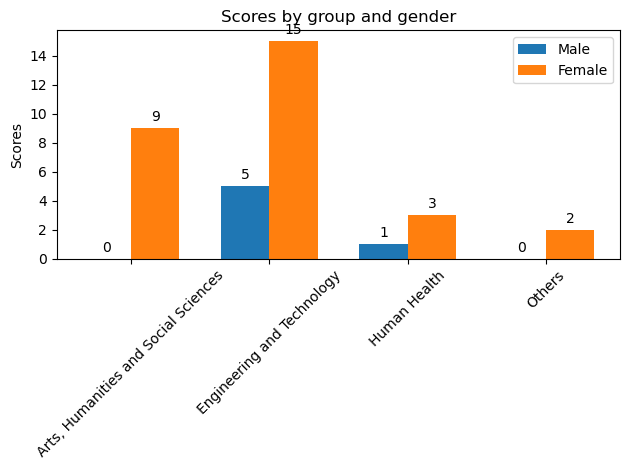

In [54]:
labels = ['Arts, Humanities and Social Sciences','Engineering and Technology','Human Health','Others']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df[df['Gender']=='Male']['Depression'],width, label='Male')
rects2 = ax.bar(x + width/2,  df[df['Gender']=='Female']['Depression'],width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels,rotation=45)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

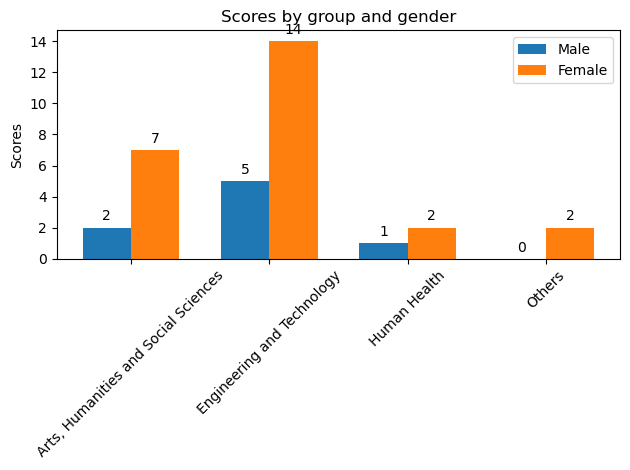

In [55]:
labels = ['Arts, Humanities and Social Sciences','Engineering and Technology','Human Health','Others']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df[df['Gender']=='Male']['Panic_Attack'],width, label='Male')
rects2 = ax.bar(x + width/2,  df[df['Gender']=='Female']['Panic_Attack'],width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels,rotation=45)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()

plt.show()

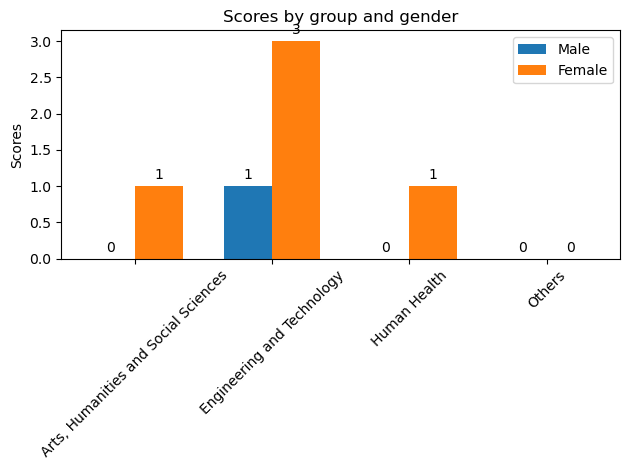

In [56]:
labels = ['Arts, Humanities and Social Sciences','Engineering and Technology','Human Health','Others']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df[df['Gender']=='Male']['Treatment'],width, label='Male')
rects2 = ax.bar(x + width/2,  df[df['Gender']=='Female']['Treatment'],width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels,rotation=45)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()

plt.show()

### All together now (Logistic Regression)

Okey, that's senough of analysing the isolated parameters. We have observed some fantastics statistics, but is it relevant to our problem?

Recall that our analysis should be based on different studying and demographic parameters of students. So, let's see which of aforementioned parameters really matter.

We are trying to predict whether a student have or does not have mental health problems (a student is considered as having mental problems if they have any symtoms of `anxiety`,`depression`,`panic attack`). The features related to a person using this regression analysis can be devided into 2 categories:
<li> Demographic features
    <ul>> Gender: catergorial, the gender of the student</ul>
    <ul>> Age: integer, the age of the student</ul>
</li>
<li> Educational features
    <ul>> Course: catergorial, the course that student is pursuing</ul>
    <ul>> Year: catergorial, the current year that student is studying</ul>
    <ul>> CGPA: The grade that student has achieved</ul>
</li>

In [57]:
cols = ['Gender','Age','Course','Year','CGPA','Marital_Status','Have Mental issues']
feature_cols = ['Gender','Age','Course','Year','CGPA','Marital_Status']

In [58]:
data['Have Mental issues']=(data[feature_cols] == 'Yes').any(axis=1)
data

,Timestamp,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment,Major,Have Mental issues
0,2020-08-07 12:02:00,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No,Engineering and Technology,False
1,2020-08-07 12:04:00,Male,21.0,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No,"Arts, Humanities and Social Sciences",False
2,2020-08-07 12:05:00,Male,19.0,It,1,3.00 - 3.49,No,Yes,Yes,Yes,No,Engineering and Technology,False
3,2020-08-07 12:06:00,Female,22.0,Law,3,3.00 - 3.49,Yes,Yes,No,No,No,"Arts, Humanities and Social Sciences",True
4,2020-08-07 12:13:00,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No,Others,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2020-07-13 19:56:49,Female,21.0,Bcs,1,3.50 - 4.00,No,No,Yes,No,No,Engineering and Technology,False
97,2020-07-13 21:21:42,Male,18.0,Engineering,2,3.00 - 3.49,No,Yes,Yes,No,No,Engineering and Technology,False
98,2020-07-13 21:22:56,Female,19.0,Nursing,3,3.50 - 4.00,Yes,Yes,No,Yes,No,Human Health,True
99,2020-07-13 21:23:57,Female,23.0,Pendidikan islam,4,3.50 - 4.00,No,No,No,No,No,"Arts, Humanities and Social Sciences",False


In [59]:
df = data.copy()
for cols in df.columns[:]:
    df[cols] = LabelEncoder().fit_transform(df[cols])
df.head()

,Timestamp,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment,Major,Have Mental issues
0,23,0,0,13,0,1,0,1,0,1,0,1,0
1,24,1,3,19,1,1,0,0,1,0,0,0,0
2,25,1,1,20,0,1,0,1,1,1,0,1,0
3,26,0,4,24,2,1,1,1,0,0,0,0,1
4,27,1,5,27,3,1,0,0,0,0,0,3,0


In [60]:
X = df[feature_cols] # Features
y = df['Have Mental issues'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [61]:
reg = LogisticRegression(class_weight='balanced').fit(X_train, y_train)

results = reg.predict(X_train)
train_acc = accuracy_score(y_train, results)*100


y_pred = reg.predict(X_test)
val_acc = accuracy_score(y_pred, y_test)*100  



print(f"Train accuracy: {train_acc}")
print(f"Validation accuracy: {val_acc}")

Train accuracy: 100.0
Validation accuracy: 100.0


# Question 2. <center> Should student need to find the support from specialist?</center>

## Introduction
**Ngữ cảnh:**  Để cải thiện sức khỏe tinh thần trong sinh viên, nhà trường đã mời một số chuyên gia tâm lí để giải đáp các thắc mắc, đưa ra các tư vấn tâm lí hữu ích cho sinh viên, từ đó nâng cao kết quả học tập và chất lượng dạy và học. Tuy nhiên, không phải sinh viên nào cũng có vấn đề sức khỏe về tâm lý, vấn đề này phụ thuộc vào nhiều yếu tố như ngành học, điểm số, tình trạng hôn nhân, ... Vì thế, bài toán đặt ra là làm thế nào để có thể giúp nhà trường có thể tìm ra các sinh viên có vấn đề về sức khỏe tinh thần.

**Giải pháp**: Một trong những giải pháp ta có thể xem xét đến là dựa vào tình trạng sức khỏe, cảm nhận của học viên về tình trạng stress, lo lắng của chính mình, từ đó xây dựng mô hình học máy để dự đoán liệu học viên đó có cần đi tư vấn tâm lí hay không.

**Ứng dụng:** Trả lời được câu hỏi để tìm ra được danh sách các sinh viên có bất ổn tâm lí, ta có thể thu hẹp danh sách sinh viên xuống đáng kể, trong khi trong 1 trường có thể có cả ngàn sinh viên. Từ đó, nâng cao chất lượng của buổi tư vấn tâm lý khi các chuyên gia biết rằng các học viên khi đến buổi tư vấn đều có một vấn đề gì đó trong cuộc sống khiến họ áp lực. Nhờ vậy, họ sẽ có các cách gợi mở tốt hơn dành cho học viên để họ có thể gỡ đi khuất mắc của chính mình, để họ hiểu được chính mình và vượt qua được áp lực trong học tập và cuộc sống.


**Về bộ dữ liệu để trả lời câu hỏi:** Câu hỏi này có thể trả lời sử dụng dữ liệu **data** phía trên với các thuộc tính cần quan tâm `Depression`, `Anxiety`, `Panic_Attack`

**Danh sách tóm tắt các bước phân tích:**

| Step        | Output |
| ----------- | ----------- |
| Lọc ra các thuộc tính cần quan tâm từ data | Dữ liệu track đã được merge thêm trường id và username từ user |
| Từ dữ liệu đã được lọc, tìm ra và  đưa dữ liệu vào mô hình phân lớp decision tree|Kết quả có hay không việc sinh viên cần đi tư vấn tâm lí|

#### One-hot encoding yes-no questions

In [62]:
df = data.copy()
for cols in df.columns[6:]:
    df[cols] = LabelEncoder().fit_transform(df[cols])
df.head()

,Timestamp,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment,Major,Have Mental issues
0,2020-08-07 12:02:00,Female,18.0,Engineering,1,3.00 - 3.49,0,1,0,1,0,1,0
1,2020-08-07 12:04:00,Male,21.0,Islamic education,2,3.00 - 3.49,0,0,1,0,0,0,0
2,2020-08-07 12:05:00,Male,19.0,It,1,3.00 - 3.49,0,1,1,1,0,1,0
3,2020-08-07 12:06:00,Female,22.0,Law,3,3.00 - 3.49,1,1,0,0,0,0,1
4,2020-08-07 12:13:00,Male,23.0,Mathemathics,4,3.00 - 3.49,0,0,0,0,0,3,0


#### General observation of the distribution of values of attributes in data through visual charts after modifying data types.

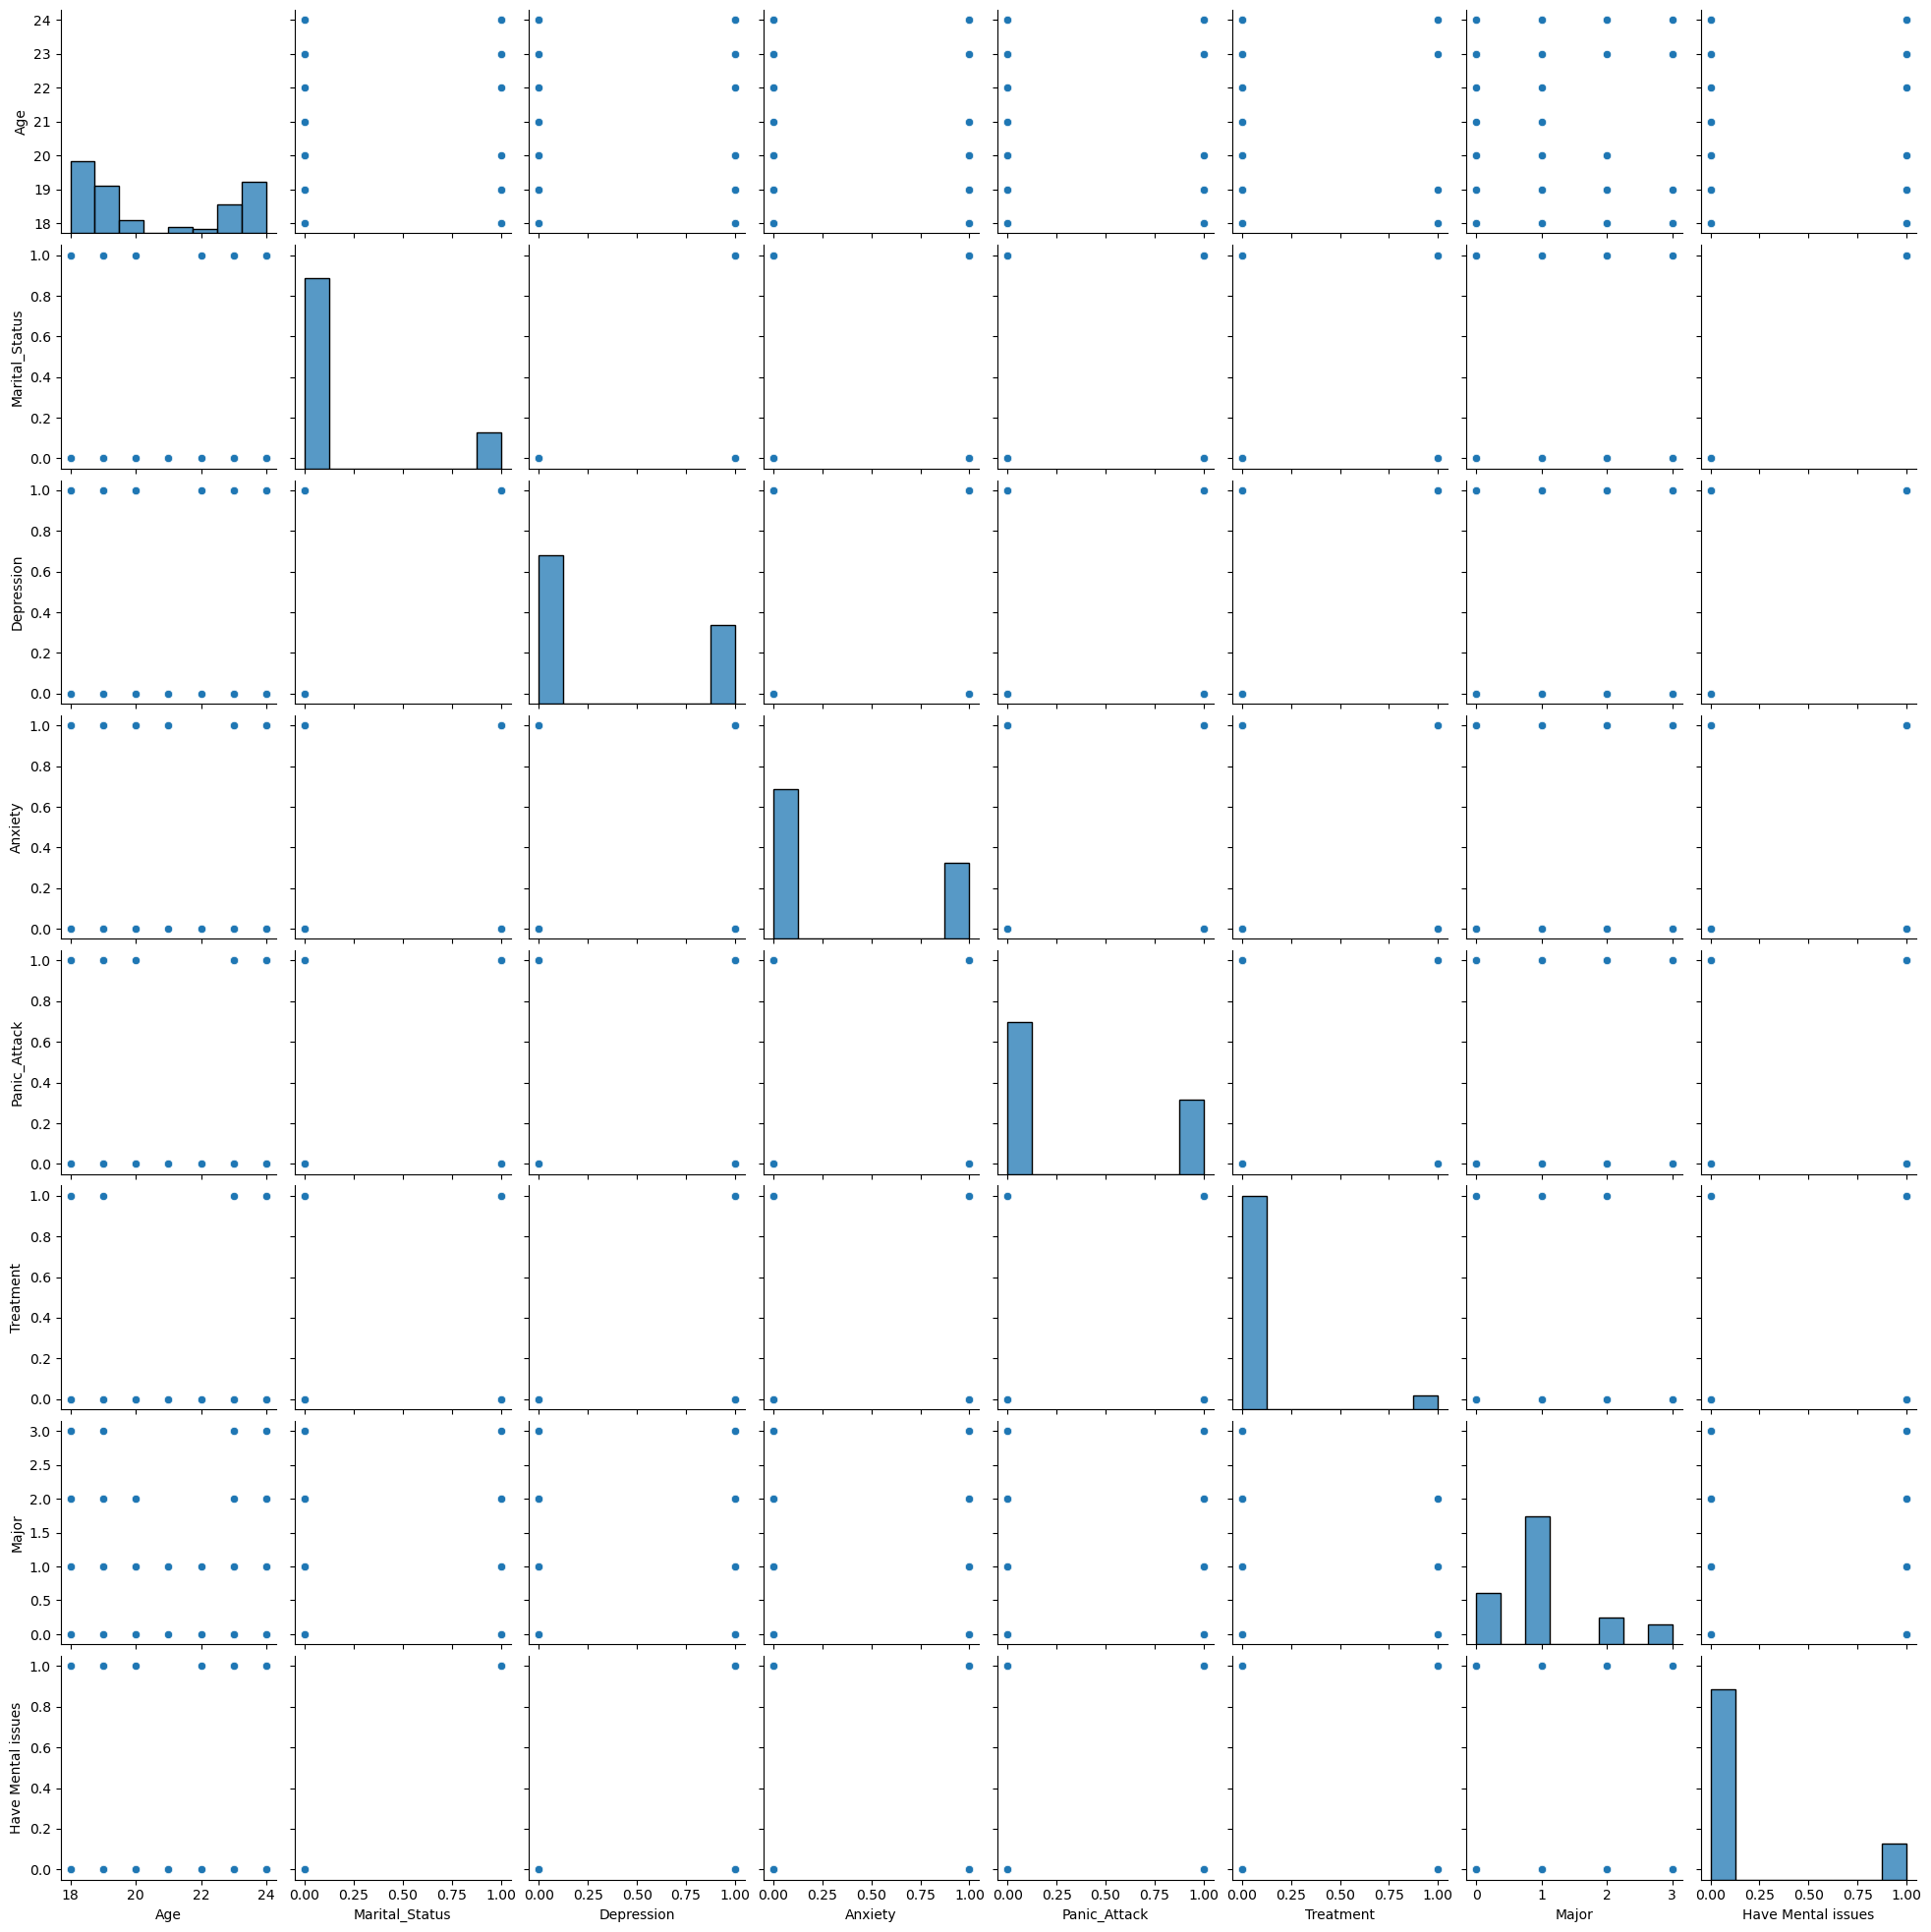

In [63]:
sns.pairplot(df)
plt.show()

#### General observation of the correlation of attributes in the data through the correlation matrix after modifying data types.

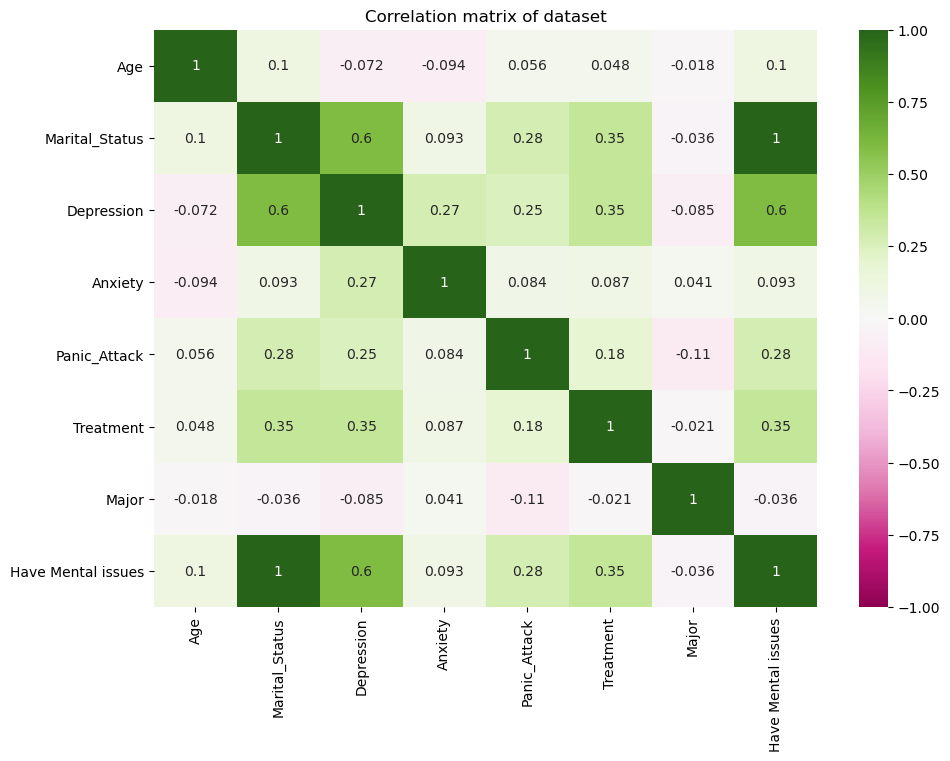

In [64]:
plt.figure(figsize=(10.7,7.5))
track_corr = sns.heatmap(df.corr(),vmin=-1, vmax=1, cmap='PiYG', annot=True)
plt.title('Correlation matrix of dataset')
plt.show()

In [65]:
feature_cols = ['Depression','Anxiety','Panic_Attack']
X = df[feature_cols] # Features
y = df['Treatment'] # Target variable

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier(criterion="gini", max_depth=4, max_features = "auto", splitter = 'random')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

results = clf.predict(X_train)
train_acc = accuracy_score(y_train, results)*100


y_pred = clf.predict(X_test)
val_acc = accuracy_score(y_pred, y_test)*100  



print(f"Train accuracy: {train_acc}")
print(f"Validation accuracy: {val_acc}")

Train accuracy: 97.14285714285714
Validation accuracy: 87.09677419354838


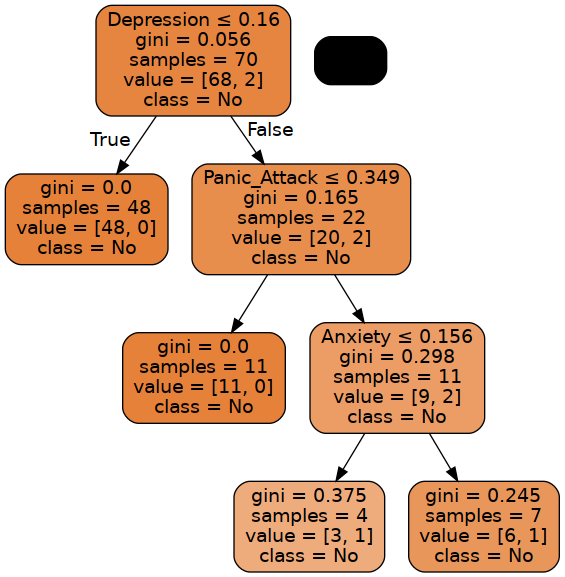

In [67]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['No','Yes'])
graph = pydotplus.graphviz.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('diabetes.png')
Image(graph.create_png())